# Lista de Exercícios 2 - Elementos de Processamento de Imagens

Prof. Gilson Antonio Giraldi \
Aluno Lorran de Araújo Durães Soares \
Questão 3

4. Escolha oito imagens de um banco de dados de imagens, denominadas \( I_1, I_2, ..., I_8 \). Converta-as de RGB para escala de cinza (se necessário) e redimensione-as para \( N X N \). Calcule a transformada discreta de seno para cada imagem, denotada por \( V_i \), onde \( i = 1, 2, ..., 8 \), e os valores absolutos correspondentes \( ABS(V_i) \), para \( i = 1, 2, ..., 8 \).

   (a) Concatene as imagens em uma lista \( I = [I_1, I_2, ..., I_8] \) e forme a lista \( L_{abs} = [ABS(V_1), ABS(V_2), ..., ABS(V_8)] \). Calcule as características estatísticas para \( L_{abs} \). Exemplos: valor mínimo, valor máximo, valor médio, desvio padrão, histograma, etc. Discuta os resultados.

   (b) Aplique o resultado do item 4a para projetar uma estratégia de redução de dimensionalidade. Visualize alguns resultados de reconstrução.


## Importando bibliotecas:

In [ ]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
from sklearn.model_selection import train_test_split

random.seed(42)
from funcoes import PCAAnalysis

## Carregando conjunto de imagens e sorteando 8

In [2]:
image_dir = './fei-database/'
images = []
image_paths = []

for img_name in os.listdir(image_dir):
    img_path = os.path.join(image_dir, img_name)
    img = Image.open(img_path)
    img = img.resize((260, 360))  
    img_array = np.array(img)
    images.append(img_array)
    image_paths.append(img_path)  

images = np.array(images)
images.shape

(400, 360, 260, 3)

In [43]:
sorted_images = []

np.random.seed(42)
indices = np.random.randint(0,400,8)

for i in range(8):
    sorted_images.append(images[indices[i]])

sorted_images = np.array(sorted_images)
sorted_images.shape

(8, 360, 260, 3)

Convertendo para a escala cinza e aplicando resize:

In [47]:
def pre_processamento(images, novo_shape):
    # deixa em tom de cinza
    images_preproces = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images])

    # deixando imagens quadradas
    images_quadradas = np.zeros(novo_shape, dtype=np.uint8)

    for i in range(images_preproces.shape[0]):
        # Calcular o ponto de corte para centralizar
        inicio_altura = (images_preproces.shape[1] - novo_shape[1]) // 2
        fim_altura = inicio_altura + novo_shape[1]
        
        # Fazer o corte e salvar no novo array
        images_quadradas[i] = images_preproces[i, inicio_altura:fim_altura, :]

    return images_quadradas

In [48]:
novo_shape = (8, 260, 260)
data = pre_processamento(sorted_images,novo_shape)
data.shape

(8, 260, 260)

## Computando Sin Tranform para todas as imagens:

In [60]:
from scipy.fftpack import dst

dst_data = []

for img in data:

    dst_data.append(dst(dst(img.T, type=1).T, type=1))

dst_data = np.array(dst_data)
dst_data.shape

(8, 260, 260)

Visualizando o resultado da tranformada:

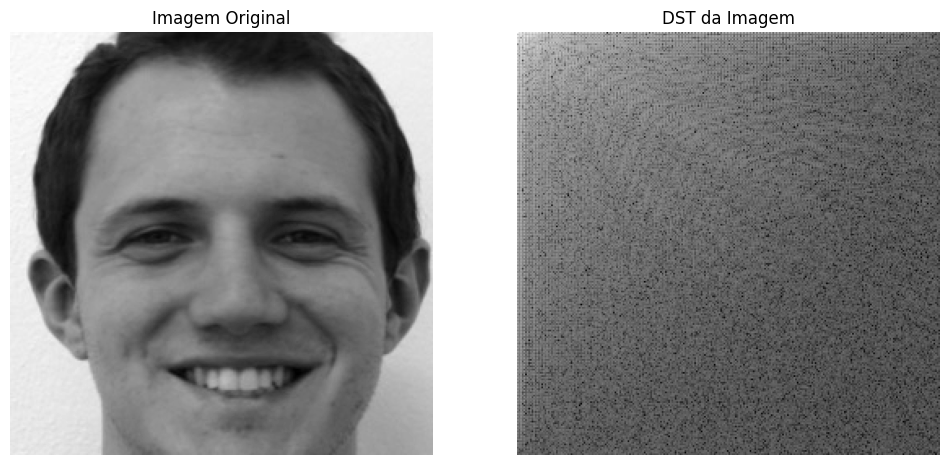

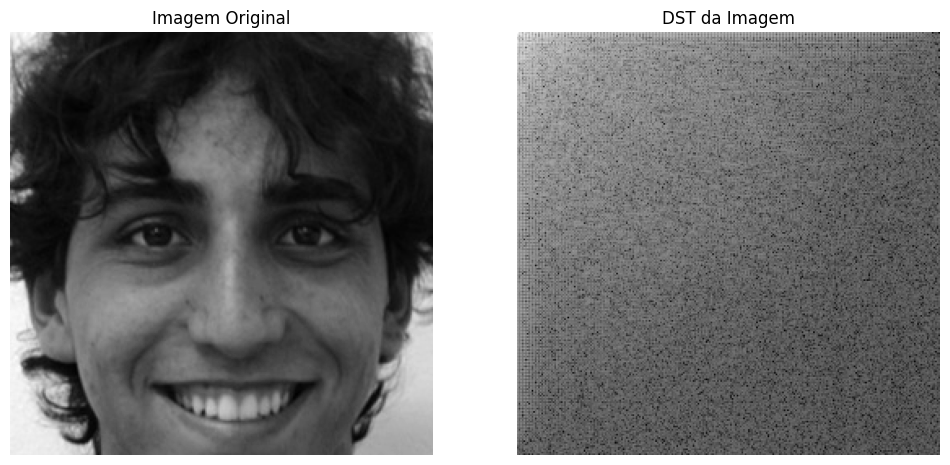

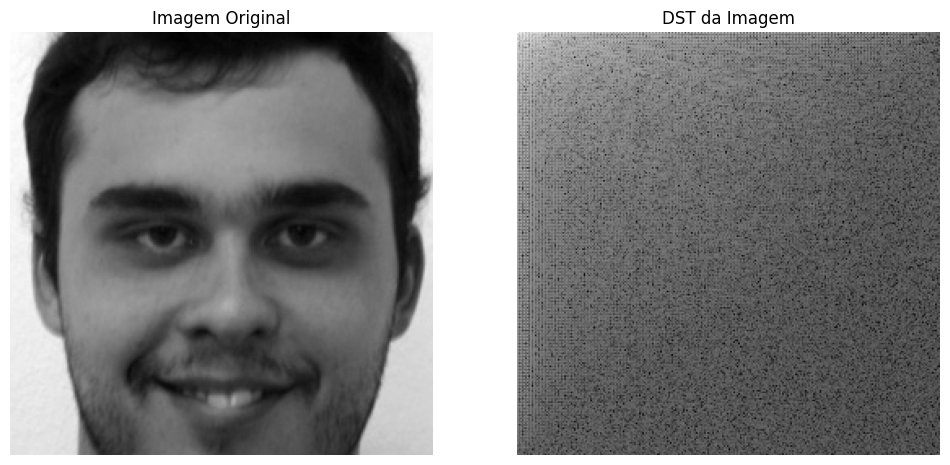

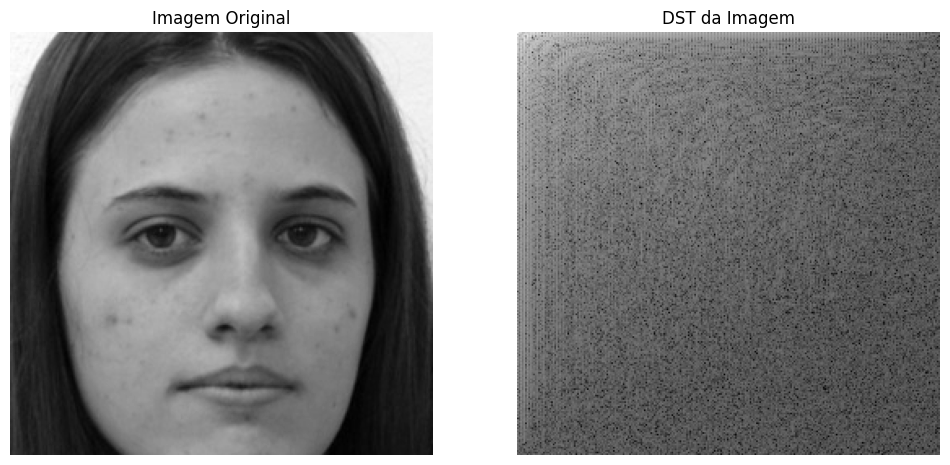

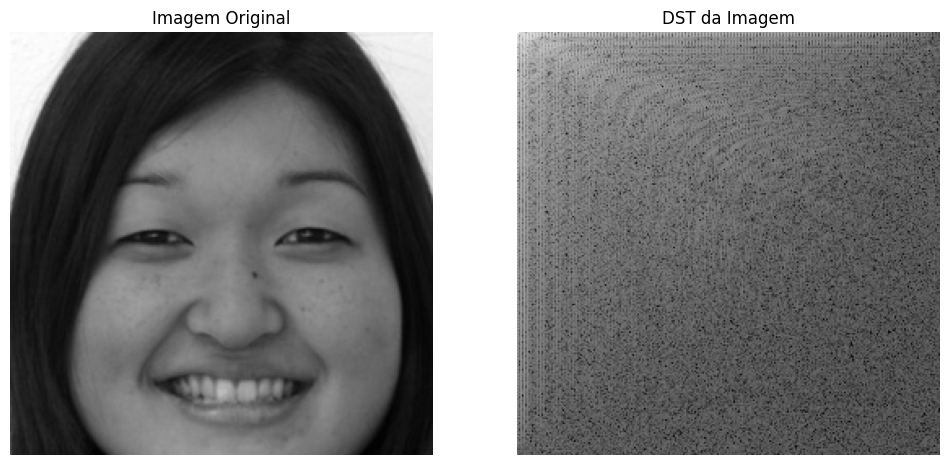

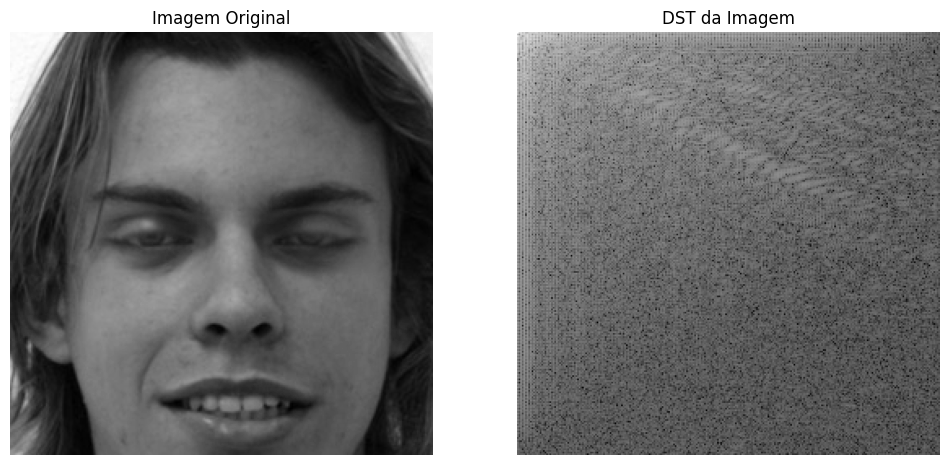

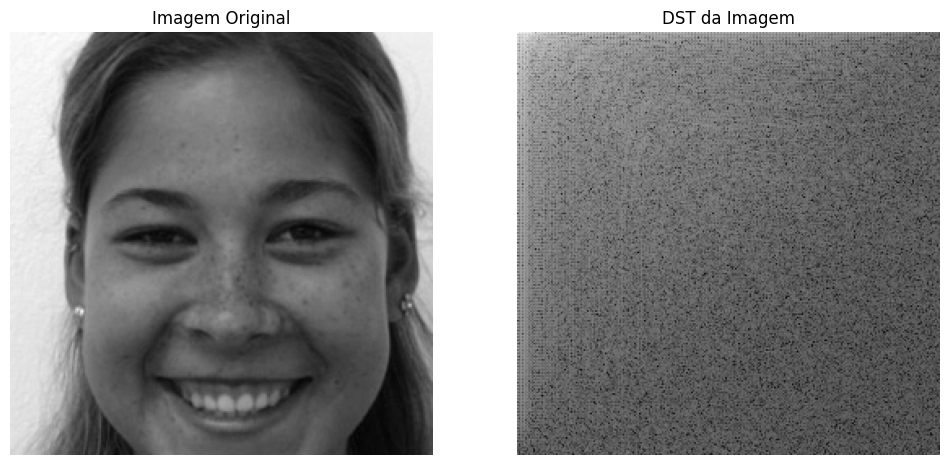

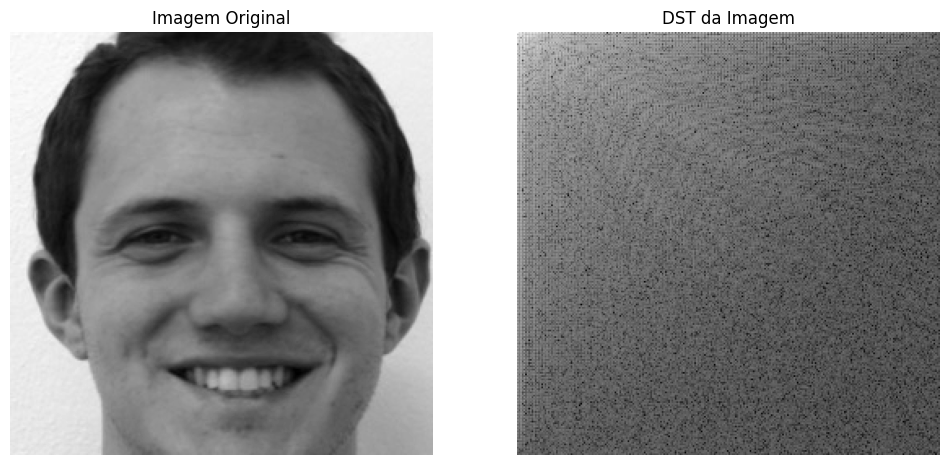

In [62]:
for i, dst_img in enumerate(dst_data):

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.title('Imagem Original')
    plt.imshow(data[i], cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('DST da Imagem')
    plt.imshow(np.log(np.abs(dst_img) + 1), cmap='gray')  # Usando log para melhor visualização
    plt.axis('off')

    plt.show()

In [63]:
L_abs = np.abs(dst_data)

for idx, imagem in enumerate(L_abs):
    media = np.mean(imagem)
    mediana = np.median(imagem)
    desvio_padrao = np.std(imagem)
    minimo = np.min(imagem)
    maximo = np.max(imagem)
    
    print(f"Imagem {idx+1}: Média={media}, Mediana={mediana}, Desvio Padrão={desvio_padrao}, Min={minimo}, Max={maximo}")

Imagem 1: Média=4597.490520391758, Mediana=528.1285914996542, Desvio Padrão=56918.753686269534, Min=0.00163653199433611, Max=9702823.85213336
Imagem 2: Média=4457.729142295194, Mediana=613.9955390726859, Desvio Padrão=39646.885813540524, Min=0.0026974954572551724, Max=6688352.056561952
Imagem 3: Média=4210.687277049037, Mediana=436.2265409728807, Desvio Padrão=51445.43365127556, Min=0.007389178558980802, Max=8894736.754186738
Imagem 4: Média=4007.3338567742617, Mediana=561.3934322992186, Desvio Padrão=50564.17091891057, Min=0.0059423922186852, Max=10601765.717103498
Imagem 5: Média=4234.954238097748, Mediana=517.7848228816719, Desvio Padrão=48143.2091322741, Min=0.003562031636647589, Max=9353909.958768696
Imagem 6: Média=3665.3905200978043, Mediana=593.5337324437758, Desvio Padrão=38879.00007979277, Min=0.0025504164901235526, Max=8109648.812061113
Imagem 7: Média=4062.301487355114, Mediana=557.0488853843586, Desvio Padrão=48694.88224081741, Min=0.014765587903156074, Max=8274699.8408667

# EXERCICIO 5

Filtro high-pass:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do filtro
size = 21  # Tamanho do filtro (deve ser ímpar)
sigma = 3  # Desvio padrão
#considerando media 0

# Criação do grid
x = np.linspace(-size//2, size//2, size)
y = np.linspace(-size//2, size//2, size)
x, y = np.meshgrid(x, y)

# Função de distribuição normal bidimensional
normal_pdf = (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(x**2 + y**2) / (2 * sigma**2))

# Normalização do filtro
normal_pdf /= np.sum(normal_pdf)